### Data Preprocessing

This step deals with cleansing the consolidated text to remove noise to ensure efficient syntactic, semantic text analysis for deriving meaningful insights from text. Some common cleaning steps are briefed below.

#### Sentence Tokenize

Tokenizing is the process of breaking a large set of texts into smaller meaningful chunks such as sentences, words, phrases. NLTK library provides sent_tokenize for sentence level tokenizing, which uses a pre-trained model PunktSentenceTokenize, to determine punctuation and characters marking the end of sentence for European languages.  

In [1]:
%matplotlib inline

import nltk

from nltk.tokenize import sent_tokenize

text='Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics. I like reading books and travelling.'

# sent_tokenize uses an instance of PunktSentenceTokenizer from the nltk. tokenize.punkt module. This instance has already been trained on and works well for many European languages. So it knows what punctuation and characters mark the end of a sentence and the beginning of a new sentence.
sent_tokenize_list = sent_tokenize(text)
print(sent_tokenize_list)

['Statistics skills, and programming skills are equally important for analytics.', 'Statistics skills, and domain knowledge are important for analytics.', 'I like reading books and travelling.']


In [2]:
# There are total 17 european languages that NLTK support for sentence tokenize
# Let's try loading a spanish model
import nltk.data
spanish_tokenizer = nltk.data.load('tokenizers/punkt/spanish.pickle')
spanish_tokenizer.tokenize('Hola. Esta es una frase espanola.')

['Hola.', 'Esta es una frase espanola.']

#### Word Tokenize

word_tokenize is a wrapper function that calls tokenize by the TreebankWordTokenizer

In [3]:
from nltk.tokenize import word_tokenize
print (word_tokenize(text))

# Another equivalent call method
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

print (tokenizer.tokenize(text))

['Statistics', 'skills', ',', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics', '.', 'Statistics', 'skills', ',', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics', '.', 'I', 'like', 'reading', 'books', 'and', 'travelling', '.']
['Statistics', 'skills', ',', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics.', 'Statistics', 'skills', ',', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics.', 'I', 'like', 'reading', 'books', 'and', 'travelling', '.']


In [4]:
# Except the TreebankWordTokenizer, there are other alternative word tokenizers, such as PunktWordTokenizer and WordPunktTokenizer
# PunktTokenizer splits on punctuation, but keeps it with the word
# from nltk.tokenize import PunktWordTokenizer
# punkt_word_tokenizer = PunktWordTokenizer()
# print punkt_word_tokenizer.tokenize(text) 

# WordPunctTokenizer splits all punctuations into separate tokens
from nltk.tokenize import WordPunctTokenizer
word_punct_tokenizer = WordPunctTokenizer()
print (word_punct_tokenizer.tokenize(text))

['Statistics', 'skills', ',', 'and', 'programming', 'skills', 'are', 'equally', 'important', 'for', 'analytics', '.', 'Statistics', 'skills', ',', 'and', 'domain', 'knowledge', 'are', 'important', 'for', 'analytics', '.', 'I', 'like', 'reading', 'books', 'and', 'travelling', '.']


#### PoS tagging

The default pos tagger model using in NLTK is maxent_treebanck_pos_tagger model

In [5]:
from nltk import chunk

tagged_sent = nltk.pos_tag(nltk.word_tokenize('This is a sample English sentence'))
print (tagged_sent)

tree = chunk.ne_chunk(tagged_sent)
tree.draw()

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('English', 'JJ'), ('sentence', 'NN')]


In [6]:
# To get help about tags
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [7]:
from nltk.tag.perceptron import PerceptronTagger

PT = PerceptronTagger()
print (PT.tag('This is a sample English sentence'.split()))

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('English', 'JJ'), ('sentence', 'NN')]


### Remove stopwords

In [8]:
from nltk.corpus import stopwords

# Function to remove stop words
def remove_stopwords(text, lang='english'):
    words = nltk.word_tokenize(text)
    lang_stopwords = stopwords.words(lang)
    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]
    return " ".join(stopwords_removed)

print (remove_stopwords('This is a sample English sentence'))

sample English sentence


### Remove punctuations

In [9]:
import string 

# Function to remove punctuations
def remove_punctuations(text):
    words = nltk.word_tokenize(text)
    punt_removed = [w for w in words if w.lower() not in string.punctuation]
    return " ".join(punt_removed)

print (remove_punctuations('This is a sample English sentence, with punctuations!'))

This is a sample English sentence with punctuations


### Remove whitespace & numbers

In [10]:
import re

# Function to remove whitespace
def remove_whitespace(text):
    return " ".join(text.split())

# Function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

text = 'This 	is a     sample  English   sentence, \n with whitespace and numbers 1234!'
print ('Original Text: ', text)
print ('Removed whitespace: ', remove_whitespace(text))
print ('Removed numbers: ', remove_numbers(text))

Original Text:  This 	is a     sample  English   sentence, 
 with whitespace and numbers 1234!
Removed whitespace:  This is a sample English sentence, with whitespace and numbers 1234!
Removed numbers:  This 	is a     sample  English   sentence, 
 with whitespace and numbers !


### Stemming

It is the process of transforming to the root word i.e., it uses an algorithm that removes common word endings for English words, such as “ly”, “es”, “ed” and “s”. For example, assuming for an analysis you may want to consider “carefully”, “cared”, “cares”, “caringly” as “care” instead of separate words.

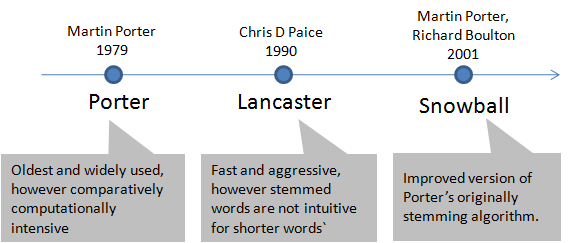

In [11]:
from IPython.display import Image
Image(filename='../Chapter 5 Figures/Stemmers.png', width=500)

In [12]:
from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer

# Function to apply stemming to a list of words
def words_stemmer(words, type="PorterStemmer", lang="english", encoding="utf8"):
    supported_stemmers = ["PorterStemmer","LancasterStemmer","SnowballStemmer"]
    if type is False or type not in supported_stemmers:
        return words
    else:
        stem_words = []
        if type == "PorterStemmer":
            stemmer = PorterStemmer()
            for word in words:
                stem_words.append(stemmer.stem(word).encode(encoding))
        if type == "LancasterStemmer":
            stemmer = LancasterStemmer()
            for word in words:
                stem_words.append(stemmer.stem(word).encode(encoding))
        if type == "SnowballStemmer":
            stemmer = SnowballStemmer(lang)
            for word in words:
                stem_words.append(stemmer.stem(word).encode(encoding))
        return stem_words
    
words =  'caring cares cared caringly carefully'  

print ("Original: ", words)
print ("Porter: ", words_stemmer(nltk.word_tokenize(words), "PorterStemmer"))
print ("Lancaster: ", words_stemmer(nltk.word_tokenize(words), "LancasterStemmer"))
print ("Snowball: ", words_stemmer(nltk.word_tokenize(words), "SnowballStemmer"))

Original:  caring cares cared caringly carefully
Porter:  [b'care', b'care', b'care', b'caringli', b'care']
Lancaster:  [b'car', b'car', b'car', b'car', b'car']
Snowball:  [b'care', b'care', b'care', b'care', b'care']


### Lemmatizer

It is the process of transforming to the dictionary base form.

In [13]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization to a list of words
def words_lemmatizer(text, encoding="utf8"):
    words = nltk.word_tokenize(text)
    lemma_words = []
    wl = WordNetLemmatizer()
    for word in words:
        pos = find_pos(word)
        lemma_words.append(wl.lemmatize(word, pos).encode(encoding))
    return lemma_words

# Function to find part of speech tag for a word
def find_pos(word):
    # Part of Speech constants
    # ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'
    # You can learn more about these at http://wordnet.princeton.edu/wordnet/man/wndb.5WN.html#sect3
    # You can learn more about all the penn tree tags at https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    pos = nltk.pos_tag(nltk.word_tokenize(word))[0][1]
    # Adjective tags - 'JJ', 'JJR', 'JJS'    
    if pos.lower()[0] == 'j':
        return 'a'
    # Adverb tags - 'RB', 'RBR', 'RBS'
    elif pos.lower()[0] == 'r':
        return 'r'
    # Verb tags - 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'
    elif pos.lower()[0] == 'v': 
        return 'v'
    # Noun tags - 'NN', 'NNS', 'NNP', 'NNPS'
    else:
        return 'n'

print ("Lemmatized: ", words_lemmatizer(words))

Lemmatized:  [b'care', b'care', b'care', b'caringly', b'carefully']


Note that in the above case, 'caringly' / 'carefully' are inflected form of care and they are an entry word listed in WordNet Dictoinary so they are retained in their actual form itself.

In [14]:
from nltk.corpus import wordnet

syns = wordnet.synsets("good")
print ("Definition: ", syns[0].definition())
print ("Example: ", syns[0].examples())

synonyms = []
antonyms = []

# Print  synonums and antonyms (having opposite meaning words)
for syn in wordnet.synsets("good"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print ("synonyms: \n", set(synonyms))
print ("antonyms: \n", set(antonyms))

Definition:  benefit
Example:  ['for your own good', "what's the good of worrying?"]
synonyms: 
 {'effective', 'undecomposed', 'estimable', 'skillful', 'practiced', 'safe', 'near', 'just', 'honest', 'secure', 'salutary', 'respectable', 'well', 'in_effect', 'unspoiled', 'dear', 'skilful', 'expert', 'sound', 'in_force', 'good', 'proficient', 'right', 'serious', 'beneficial', 'dependable', 'ripe', 'upright', 'full', 'unspoilt', 'goodness', 'trade_good', 'commodity', 'adept', 'thoroughly', 'honorable', 'soundly'}
antonyms: 
 {'badness', 'ill', 'evilness', 'bad', 'evil'}


### N-grams

In [15]:
from nltk.util import ngrams
from collections import Counter

# Function to extract n-grams from text
def get_ngrams(text, n):
    n_grams = ngrams(nltk.word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]  

text = 'This is a sample English sentence'

print ("1-gram: ", get_ngrams(text, 1))
print ("2-gram: ", get_ngrams(text, 2))
print ("3-gram: ", get_ngrams(text, 3))
print ("4-gram: ", get_ngrams(text, 4))

1-gram:  ['This', 'is', 'a', 'sample', 'English', 'sentence']
2-gram:  ['This is', 'is a', 'a sample', 'sample English', 'English sentence']
3-gram:  ['This is a', 'is a sample', 'a sample English', 'sample English sentence']
4-gram:  ['This is a sample', 'is a sample English', 'a sample English sentence']


Let's extract bigram and count their respective frequency 

In [16]:
text = 'Statistics skills, and programming skills are equally important for analytics. Statistics skills, and domain knowledge are important for analytics'

# remove punctuations
text = remove_punctuations(text)

# Extracting bigrams
result = get_ngrams(text,2)

# Counting bigrams
result_count = Counter(result)

print ("Words: ", result_count.keys()) # Bigrams
print ("\nFrequency: ", result_count.values()) # Bigram frequency

# Converting to the result to a data frame
import pandas as pd
df = pd.DataFrame.from_dict(result_count, orient='index')
df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index and column name
print (df)

Words:  dict_keys(['Statistics skills', 'skills and', 'and programming', 'programming skills', 'skills are', 'are equally', 'equally important', 'important for', 'for analytics', 'analytics Statistics', 'and domain', 'domain knowledge', 'knowledge are', 'are important'])

Frequency:  dict_values([2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1])
                      frequency
Statistics skills             2
skills and                    2
and programming               1
programming skills            1
skills are                    1
are equally                   1
equally important             1
important for                 2
for analytics                 2
analytics Statistics          1
and domain                    1
domain knowledge              1
knowledge are                 1
are important                 1


In [17]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 

# Create a dictionary with key as file names and values as text for all files in a given folder
def CorpusFromDir(dir_path):
    result = dict(docs = [open(os.path.join(dir_path,f)).read() for f in os.listdir(dir_path)],
               ColNames = map(lambda x: x, os.listdir(dir_path)))
    return result

docs = CorpusFromDir('Data/text_files/')

# Initialize
vectorizer = CountVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))

#create dataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

# Change column headers to be file names
df.columns = docs.get('ColNames')
print (df)

             Doc_2.txt  Doc_3.txt  Doc_1.txt
analytics            1          0          1
and                  1          1          1
are                  1          0          1
books                0          1          0
domain               1          0          0
equally              0          0          1
for                  1          0          1
important            1          0          1
knowledge            1          0          0
like                 0          1          0
programming          0          0          1
reading              0          1          0
skills               1          0          2
statistics           1          0          1
travelling           0          1          0


### TF-IDF

In the area of information retrieval TF-IDF is a good statistical measure to reflect the relevance of term to the document in a collection of documents or corpus. Let’s break TF_IDF and apply example to understand it better.

TF (term) =  (Number of times term appears in a document)/(Total number of terms in the document)
IDF (term) = log⁡(  (Total number of documents)/(Number of documents with a given term in it))

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = CorpusFromDir('Data/text_files/')

vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(docs.get('docs'))

#create dataFrame
df = pd.DataFrame(doc_vec.toarray().transpose(), index = vectorizer.get_feature_names())

# Change column headers to be file names
df.columns = docs.get('ColNames')
print (df)

             Doc_2.txt  Doc_3.txt  Doc_1.txt
analytics     0.315269   0.000000   0.276703
and           0.244835   0.283217   0.214884
are           0.315269   0.000000   0.276703
books         0.000000   0.479528   0.000000
domain        0.414541   0.000000   0.000000
equally       0.000000   0.000000   0.363831
for           0.315269   0.000000   0.276703
important     0.315269   0.000000   0.276703
knowledge     0.414541   0.000000   0.000000
like          0.000000   0.479528   0.000000
programming   0.000000   0.000000   0.363831
reading       0.000000   0.479528   0.000000
skills        0.315269   0.000000   0.553405
statistics    0.315269   0.000000   0.276703
travelling    0.000000   0.479528   0.000000
